<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

In [3]:
connection = psycopg2.connect(
   dbname=DBNAME,
   user=USER,
   host=HOST,
   password=PASSWORD,
   port=PORT
)

In [4]:
# Избегаем отображение предупреждений об использовании sqlalchemy 
import warnings
warnings.filterwarnings("ignore")

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [5]:
query_3_1 = f'''
/* 
  Данный запрос считает общее количество записей в таблице 'vacancies'.
*/
select
    count(*) count_vacancies
from
    public.vacancies
'''

In [6]:
data = pd.read_sql_query(query_3_1, connection)
data

,count_vacancies
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [7]:
query_3_2 = f'''
/* 
  Данный запрос считает общее количество записей в таблице 'employers'.
*/
select
    count(*) count_employers
from
    public.employers
'''

In [8]:
data = pd.read_sql_query(query_3_2, connection)
data

,count_employers
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [9]:

query_3_3 = f'''
/* 
  Данный запрос считает общее количество записей в таблице 'areas'.
*/
select
    count(*) count_areas
from
    public.areas
'''

In [10]:
data = pd.read_sql_query(query_3_3, connection)
data

,count_areas
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [11]:
query_3_4 = f'''
/* 
  Данный запрос считает общее количество записей в таблице 'industries'.
*/
select
    count(*) count_industries
from
    public.industries
'''

In [12]:
data = pd.read_sql_query(query_3_4, connection)
data

,count_industries
0,294


***

В этом юните мы провели предварительный анализ доступных данных:

1. Общее количество вакансий — 49 197. Это примерно в два раза больше числа работодателей, то есть в среднем на одного работодателя приходится по две вакансии.

2. Число работодателей — 23 501. Таким образом, на каждые две вакансии приходится примерно один работодатель.

3. Количество населённых пунктов (регионов), представленных в базе, — 1 362. В выборке охвачены практически все крупные города России и стран ближнего зарубежья.

4. Число сфер деятельности — 294.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [13]:
query_4_1 = f'''
/* 
Данный запрос получает названия регионов и количество вакансий в каждом из них.
Информация извлекается из таблиц areas и vacancies, которые объединяются по полю area_id.
Далее данные группируются по регионам, сортируются по убыванию количества вакансий, и выводятся только первые пять строк результата.
*/
select
    a.name,
    count(v.area_id) cnt
from
    public.areas a
join
    public.vacancies v on v.area_id = a.id
group by a.name
order by 2 desc
limit 5
'''

In [14]:
data = pd.read_sql_query(query_4_1, connection)
data

,name,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [15]:
query_4_2 = f'''
/*Запрос получает идентификаторы вакансий и подсчитывает количество заполненных значений в столбцах salary_from и salary_to.
Данные берутся из таблицы vacancies, расположенной в схеме public.
Результат группируется по идентификатору вакансии и включает только те строки, где хотя бы одно из полей salary_from или salary_to не пустое. 
*/
select
    v.id,
    count(v.salary_from) salary_from,
    count(v.salary_to) salary_to
from
    public.vacancies v
group by v.id
having count(v.salary_from) + count(v.salary_to) > 0
'''

In [16]:
data = pd.read_sql_query(query_4_2, connection)
data

,id,salary_from,salary_to
0,6555939,1,0
1,14694668,1,0
2,14820007,1,0
3,16142474,1,1
4,17987111,1,0
...,...,...,...
24068,66195906,1,1
24069,66196086,1,0
24070,66196283,1,1
24071,66196369,1,1


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [17]:
query_4_3 = f'''
/* Запрос рассчитывает средние значения столбцов salary_from и salary_to из таблицы vacancies, которая размещена в схеме public.
*/
select 
    round(avg(v.salary_from)) avg_salary_from,
    round(avg(v.salary_to)) avg_salary_to
from 
    public.vacancies v
'''

In [18]:
data = pd.read_sql_query(query_4_3, connection)
data

,avg_salary_from,avg_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [19]:
query_4_4 = f'''
/* 
  Запрос извлекает пары значений из столбцов schedule и employment, а также считает количество вакансий для каждой из этих комбинаций, используя данные из таблицы vacancies.
Результат группируется по графику работы и типу занятости, затем сортируется по убыванию количества вакансий.
Благодаря конструкции offset 1 limit 1 возвращается вторая по популярности комбинация.
*/
select
    schedule,
    employment,
    count(*) vacancy_count
from
    public.vacancies
group by
    schedule,
    employment
order by
    vacancy_count desc
offset 1
limit 1
'''

In [20]:
data = pd.read_sql_query(query_4_4, connection)
data

,schedule,employment,vacancy_count
0,Удаленная работа,Полная занятость,7802


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [21]:
query_4_5 = f'''
/* Запрос выполняет группировку вакансий по уровню требуемого опыта (experience) и считает, сколько вакансий соответствует каждому уровню.
Результат упорядочивается по количеству вакансий в порядке возрастания.
*/
select
    experience,
    count(*) vacancy_count
from
    public.vacancies
group by
    experience
order by
    vacancy_count asc
'''

In [22]:
data = pd.read_sql_query(query_4_5, connection)
data

,experience,vacancy_count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

Выводы по результатам анализа вакансий:

1. Большинство вакансий сосредоточено в крупнейших городах-миллионниках, с абсолютным лидером — Москвой, где размещено 5333 вакансии.

2. Почти в половине вакансий указана зарплата — 24073 из 49197. В остальных случаях предполагается, что уровень оплаты определяется по итогам собеседования.

3. Средние значения по зарплатной вилке составляют: нижняя граница — 71 065 рублей, верхняя — 110 537 рублей. Эти значения превышают средние зарплаты по России и странам ближнего зарубежья.

4. Комбинация «Удалённая работа и Полная занятость» встречается в 7802 вакансиях.

5. Наиболее часто работодатели ищут специалистов с опытом от 1 до 3 лет — таких вакансий 26 152.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [23]:
query_5_1 = f'''
/* 
  Данный запрос извлекает названия компаний и количество связанных с ними вакансий из таблиц 
  vacancies и employers. Связь между таблицами осуществляется по полю employer_id. 
  Результаты группируются по наименованию работодателя, упорядочиваются по убыванию числа вакансий, 
  и с помощью LIMIT 5 отображаются только топ-5 компаний с наибольшим количеством вакансий.
*/
select
    e.name,
    count(v.employer_id) count_vacancies
from
    public.vacancies v
join
    public.employers e on e.id = v.employer_id
group by
    e.name
order by
    count_vacancies desc
limit 5
'''

In [24]:
data = pd.read_sql_query(query_5_1, connection)
data

,name,count_vacancies
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [25]:
query_5_2 = f'''
/* 
  Запрос получает наименования регионов из таблицы areas, а также рассчитывает количество уникальных работодателей и вакансий в каждом регионе. 
  Для учета регионов без вакансий используется LEFT JOIN с таблицами vacancies и employers. Данные группируются по названию региона, 
  сортируются по убыванию числа уникальных работодателей, и с помощью LIMIT 1 выводится регион с их наибольшим количеством.
*/
select
    a.name region_name,
    count(DISTINCT e.id) count_employers,
    count(v.id) count_vacancies
from
    public.areas a
left join
    public.vacancies v on a.id = v.area_id
left join
    public.employers e on a.id = e.area
where
    v.id is null
group by
    a.name
order by
    count(DISTINCT e.id) desc
limit 1
'''

In [26]:
data = pd.read_sql_query(query_5_2, connection)
data

,region_name,count_employers,count_vacancies
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [27]:
query_5_3 = f'''select 
/*Запрос извлекает названия работодателей и рассчитывает, в скольких различных регионах у каждого из них размещены вакансии. 
Данные берутся из таблиц vacancies и employers, связываемых по employer_id. Группировка происходит по названию работодателя, 
затем результаты сортируются по числу уникальных регионов в порядке убывания. С помощью LIMIT 1 выводится работодатель с наибольшим географическим охватом.
 */
    e.name,
    count(DISTINCT area_id) unique_area
from
    public.vacancies v
join
    public.employers e on e.id = v.employer_id
group by e.name
order by count(DISTINCT area_id) desc
limit 1
'''

In [28]:
data = pd.read_sql_query(query_5_3, connection)
data

,name,unique_area
0,Яндекс,181


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [29]:
query_5_4 = f'''select 
/* Запрос подсчитывает количество уникальных работодателей, 
  не связанных с какой-либо отраслью, из таблиц 'employers' и 'employers_industries'. 
  Используется LEFT JOIN для связи работодателей и отраслей.
  Результат фильтруется по отсутствию связи работодателя с отраслью (industry_id is null).
  */
    count(distinct e.id)
from
    public.employers e
left join
    public.employers_industries ei on e.id = ei.employer_id
where
    ei.industry_id is Null 
'''

In [30]:
data = pd.read_sql_query(query_5_4, connection)
data

,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [31]:
query_5_5 = f'''
/* Этот запрос выбирает название работодателя ('name'), который имеет связи с четырьмя отраслями,
  из таблиц 'employers' и 'employers_industries'.
  Используется JOIN для связи работодателей и отраслей.
  Результат группируется по идентификатору работодателя и его названию, фильтруется по количеству связей с отраслями равному 4.
  Затем результат сортируется по названию работодателя в алфавитном порядке и выводится третий по алфавиту с помощью 'limit 1 offset 2'
*/
select
    e.name
from
    public.employers e
join
    public.employers_industries ei on e.id = ei.employer_id
group by
    e.id,
    e.name
having
    count(ei.industry_id) = 4
order by
    e.name
limit 1 offset 2
'''

In [32]:
data = pd.read_sql_query(query_5_5, connection)
data

,name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [33]:
query_5_6 = f'''
/* 
  Этот запрос подсчитывает количество уникальных работодателей, 
  связанных с отраслью 'Разработка программного обеспечения', 
  из таблиц 'employers', 'employers_industries' и 'industries'. 
  Используются JOIN для связи работодателей, отраслей и их связей.
  Результат фильтруется по названию отрасли 'Разработка программного обеспечения'.
*/
select
    count(distinct e.id) employer_count
from
    public.employers e
join
    public.employers_industries ei on e.id = ei.employer_id
join
    public.industries i on ei.industry_id = i.id
where
    i.name = 'Разработка программного обеспечения'
'''

In [34]:
data = pd.read_sql_query(query_5_6, connection)
data

,employer_count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [35]:
# Код для получения списка городов-милионников
city = ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Нижний Новгород',
        'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск',
        'Пермь', 'Воронеж', 'Волгоград', 'Краснодар')

# Получаем нужные для нас данные.
import requests
from bs4 import BeautifulSoup

url='https://ru.wikipedia.org/wiki/Города-миллионеры_России'
response=requests.get(url)
page=BeautifulSoup(response.text,'html.parser')

cities_here=str(page.find('table', class_="standard"))
cities_here=cities_here.split('title="')[3:]

cities=[]
for i in cities_here:
    cities.append(i.split('">')[0])

cities

['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Красноярск',
 'Нижний Новгород',
 'Челябинск',
 'Уфа',
 'Самара',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград']

In [36]:
# текст запроса
query_5_7 = f'''
/* Определяем количество вакансий, связанных с Яндексом, в указанных городах 
*/
with yandex_vacancies as (
    select
        a.name region_name,
        count(v.id) cnt
    from
        public.vacancies v
    join
        public.areas a on v.area_id = a.id
    join
        public.employers e on v.employer_id = e.id
    where
        e.name = 'Яндекс'
        and a.name in {city}
    group by
        a.name
)
/* Сводим результаты по регионам и вычисляем общее количество вакансий 
*/
select
    region_name,
    cnt
from
    yandex_vacancies
    
union all

select
    'Total',
    sum(cnt)::int4
from
    yandex_vacancies
order by
    cnt 
    
'''

In [37]:
data = pd.read_sql_query(query_5_7, connection)
data

,region_name,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Самара,26
8,Уфа,26
9,Краснодар,30


***

Выводы по анализу работодателей:

"Яндекс" занимает лидирующую позицию по числу вакансий среди работодателей, предлагая 1933 вакансии, что значительно больше, чем у второго по численности "Ростелекома" — 491 вакансия. В регионах наибольшее количество вакансий зарегистрировано в России, их 410.

Как и предполагалось, "Яндекс" имеет наибольшее количество регионов с вакансиями — 181. Стоит отметить, что многие работодатели не указали сферу своей деятельности — 8419 из 23175. У ряда компаний указано несколько сфер деятельности, при этом более 1000 компаний работают в четырех различных сферах.

Более 3500 компаний отметили, что их сфера деятельности — "Разработка программного обеспечения". В крупных городах сосредоточено наибольшее количество вакансий. Например, в Москве "Яндекс" предлагает 54 вакансии, а в Санкт-Петербурге — 42 вакансии.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [38]:
query_6_1 = f'''
/* Подсчитываем количество вакансий с ключевыми словами "data" или "данные" в названии */
select
    count(v.name) data_vacancies
from
    public.vacancies v
where
    lower(v.name) like '%data%' or lower(v.name) like '%данн%'
'''

In [39]:
data = pd.read_sql_query(query_6_1, connection)
data

,data_vacancies
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [40]:
query_6_2 = f'''
/* Подсчитываем количество вакансий для начинающих в области Data Science и Machine Learning */
select
    count(*) junior_vacancies
from
    public.vacancies v
where (lower(v.name) LIKE '%data scientist%' or 
      lower(v.name) LIKE '%data science%' or 
      lower(v.name) LIKE '%исследователь данных%' or 
      (lower(v.name) LIKE '%ml%' and lower(v.name) NOT LIKE '%html%') or
      lower(v.name) LIKE '%machine learning%' or
      lower(v.name) LIKE '%машинн%обучен%'
      ) and
      (lower (v.name) LIKE '%junior%' or
      lower (v.experience) LIKE '%нет опыта%' or
      lower (v.employment) LIKE '%стажировка%')
'''

In [41]:
data = pd.read_sql_query(query_6_2, connection)
data

,junior_vacancies
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [42]:
query_6_3 = f'''
/* 
   Подсчитываем количество вакансий в области Data Science с требуемыми навыками в SQL и PostgreSQL.
*/
select
    count(*) ds_vacancies
from
    public.vacancies v
where (lower(v.key_skills) LIKE '%sql%' or
      lower(v.key_skills) LIKE '%postgres%')
      and
      (lower(v.name) LIKE '%data scientist%' or 
      lower(v.name) LIKE '%data science%' or 
      lower(v.name) LIKE '%исследователь данных%' or 
      (lower(v.name) LIKE '%ml%' and lower(v.name) NOT LIKE '%html%') or
      lower(v.name) LIKE '%machine learning%' or
      lower(v.name) LIKE '%машинн%обучен%'
      )
'''

In [43]:
data = pd.read_sql_query(query_6_3, connection)
data

,ds_vacancies
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [44]:
query_6_4 = f'''
/* 
   Подсчитываем количество вакансий в области Data Science, требующих навыков программирования на Python.
*/
select
    count(*) python_DS_vacancies
from
    public.vacancies v
where
    (
        lower(v.name) like '%data scientist%' or
        lower(v.name) like '%data science%' or
        lower(v.name) like '%исследователь данных%' or
        (lower(v.name) like '%ml%' AND lower(v.name) NOT LIKE '%html%') or
        lower(v.name) like '%machine learning%' or
        lower(v.name) like '%машинн%обучен%'
    )
    and
    (
        v.key_skills like '%Python%'
    )
'''

In [45]:
data = pd.read_sql_query(query_6_4, connection)
data

,python_ds_vacancies
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [46]:
query_6_5 = f'''
/* 
   Вычисляем среднее количество навыков, указанных в описании вакансии, 
   для вакансий в области Data Science.
*/
select
    round(avg(length(key_skills) - length(replace(key_skills, CHR(9), ''))+1), 2) as avg_skills
from
  public.vacancies
where
  (name ilike '%data scientist%'
    or name ilike '%data science%'
    or name ilike '%исследователь данных%'
    or (name like '%ML%'
    and name not like '%HTML%')
    or name ilike '%machine learning%'
    or name ilike '%машинн%обучен%')
'''

In [47]:
data = pd.read_sql_query(query_6_5, connection)
data

,avg_skills
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [48]:
# текст запроса
query_6_6 = f'''
/*
   Данный запрос извлекает уникальные значения уровня опыта (experience) и рассчитывает среднюю зарплату (mean_salary) для вакансий, 
   связанных с Data Science и Machine Learning. Средняя зарплата определяется как среднее между salary_from и salary_to, 
   если оба значения присутствуют. В случае, если одно из них отсутствует (NULL), используется только доступное значение. 
   После этого данные агрегируются по уровню опыта.
*/
select distinct
    experience,
    round(avg(coalesce((salary_from + salary_to)/2, salary_from, salary_to)), 0) as mean_salary
from
    public.vacancies
where
    (name ilike '%data scientist%'
    or name ilike '%data science%'
    or name ilike '%исследователь данных%'
    or (name like '%ML%'
    and name not like '%HTML%')
    or name ilike '%machine learning%'
    or name ilike '%машинн%обучен%')
    and (salary_from is not null
    or salary_to is not null)
group by 1
'''

In [49]:
data = pd.read_sql_query(query_6_6, connection)
data

,experience,mean_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


Выводы по предметному анализу:

Всего обнаружено 1771 вакансия, относящаяся к сфере работы с данными. Для начинающих специалистов в области Data Science доступна 51 вакансия. В 229 вакансиях ключевым навыком указаны SQL или Postgres, что свидетельствует о востребованности работы с базами данных.

Python также занимает ведущие позиции среди требований работодателей к специалистам DS — он указан как ключевой навык в 357 вакансиях. В среднем в описаниях вакансий по Data Science указывается около 6 ключевых навыков.

Заработная плата для специалистов в данной области, как правило, достаточно высокая. При этом наблюдается прямая зависимость между уровнем опыта и размером зарплаты: например, для кандидатов с опытом от 3 до 6 лет средняя зарплата составляет около 243 тысяч рублей.

***

# Общий вывод по проекту

В рамках проведённого исследования было проанализировано 49 197 вакансий, из которых 1 771 связаны с работой с данными. Наибольшее количество вакансий приходится на следующие профессии: системный администратор (1 761), программист 1С (1 153), бизнес-аналитик (488), специалист технической поддержки (457) и системный аналитик (432).

Анализ показал, что специалисты в сфере информационных технологий пользуются высоким спросом на рынке труда. Для более полного понимания ситуации на рынке было бы полезно дополнительно проанализировать данные о резюме соискателей, чтобы сопоставить требования работодателей с ожиданиями кандидатов.

In [50]:
query_7_1 = f'''
select
    v.name,
    count(v.id) as count_vac
from
    public.vacancies as v
group by 1
order by 2 desc
'''

In [51]:
df = pd.read_sql_query(query_7_1, connection)
df

,name,count_vac
0,Системный администратор,1761
1,Программист 1С,1153
2,Бизнес-аналитик,488
3,Специалист технической поддержки,457
4,Системный аналитик,432
...,...,...
21218,Генеральный менеджер Проекта,1
21219,Ведущий инженер-программист (1С:УПП),1
21220,Главный специалист IT направления,1
21221,Сотрудник Отдела информационных систем,1


# Заверешение исследования

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

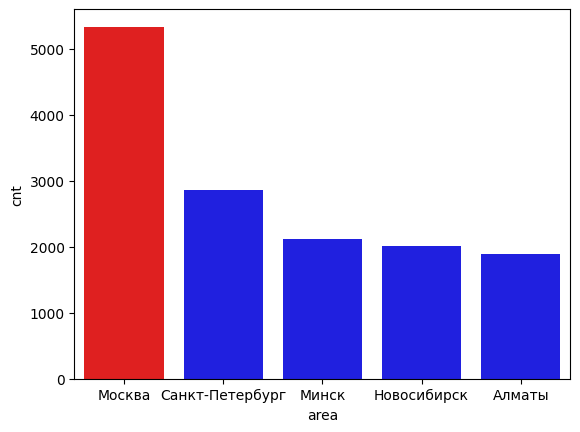

In [53]:
query_4_1 = f'''
select
    a.name area, 
    count(v.area_id) cnt
from 
    vacancies v 
join
    areas a ON v.area_id = a.id
group by a.id, a.name
order by 2 DESC
limit 5
'''
df = pd.read_sql_query(query_4_1, connection)

filtred_color = [('red' if x > 3000 else 'blue') for x in df.cnt]
sns.barplot(df, x='area', y='cnt', palette=filtred_color);

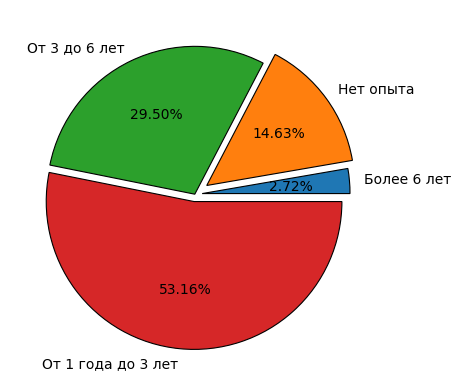

In [54]:
query_4_5 = f'''
select 
    experience, 
    count(id)
from 
    vacancies
group by 1
order by 2
'''
df = pd.read_sql_query(query_4_5, connection)

plt.pie(
    df['count'],
    labels = df['experience'].values,
    autopct = '%.2f%%',
    explode = (0.05, 0.1, 0, 0.05),
    wedgeprops = {'lw':0.8,'edgecolor':'k'},   
);

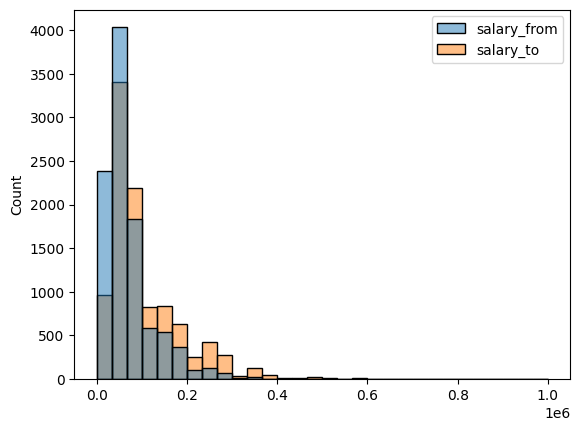

In [55]:
query_4_3 = f'''
select 
    salary_from as salary_from, 
    salary_to as salary_to
from
    vacancies
'''
df = pd.read_sql_query(query_4_3, connection)
df.dropna(inplace=True)
sns.histplot(data=df, bins=30);

In [56]:
# не забываем закрыть соединение после окончания работы
connection.close()